In [23]:
 # The merger rate of the PBH binaries without DM halos assuming that t_merge holds for vaccum only.
# m_j = m_2
# m_i = m_1  and m_2 < equal to m_1.


import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
import mass_function
from matplotlib.ticker import LogFormatter 
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


PBH_mass_function = np.loadtxt("PBH_mass_function.txt")




π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3





# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.
    
    
    
def merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence):
    
    if  m_1 < 5: 
        return 0
    
    elif m_2 < 5:
        return 0
    
    else:
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
        
        X = np.geomspace(X_min, X_max, 1000000) 

    
    
    
        if DM_halos_presence == 'False':
        
        # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .
        
        
            k_nohalo = 22.3819
            A_nohalo = ((ρ_eq**(4/3))*(G**3)*(k_nohalo**7))/(c**5)

            def B(m_1,m_2,Δ_1,Δ_2):
                return (A_nohalo**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

            
        
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
        
            
        else:

            # Merger rate of  PBH binaries with halos for PBHs mass range of 5 M☉-100 M☉ .
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))


            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))

        

            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


            #Schwarzchild Radius of the PBH.
            def r_s(m): 
                return ((2*G*m)/(c**2)) 


            #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
            def r_ta(m): 
                return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


            # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
            def E_b(m): 
                return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



            def a_initial(m_1, m_2, Δ_1, Δ_2, X):
                return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

            def beta(m_1,m_2,Δ_1, Δ_2, X):
                return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))


            k_halo = 22.3387
            A_halo= ((ρ_eq**(4/3))*(G**3)*(k_halo**7))/(c**5)

            def B(m_1,m_2,Δ_1,Δ_2):
                return (A_halo**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 

            
        
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
                return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21))  * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))
        
        
        
        def integrand(m_1,m_2,Δ_1,Δ_2, X):
            return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
    

        return (1/(14 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand(m_1,m_2,Δ_1,Δ_2, X),X)) 
     

In [4]:
# Merger rates for Power Law of PBH masses from m_min = 1e-2 M☉ - m_max = 100 M☉ as per
# LVK Collaboration merger data in mass range (5 - 100)M☉ .

In [16]:
bin_centres = np.geomspace(2e-2, 78, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-2, 78, 16)
m_2 = np.geomspace(2e-2, 78, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
 
 
    
    
m_1_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78]  
m_2_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] 


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_min = 1e-2  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-9
X_max = 1e5


m_1 = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] M☉

Δ_1 = [0.0111651, 0.01937612, 0.03362569, 0.05835466, 0.10126977, 0.17574547, 0.30499199, 0.52928885, 0.91853783, 1.59404786, 2.76634068, 4.80075972, 8.33132886, 14.45834503, 25.09128432, 43.54388745]


In [3]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_PWR_nohalo_LVK_range = np.zeros((16, 16))


merger_sum = 0
for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1e-3      #choosen as an arbitrary value for now
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2      #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR_nohalo_LVK_range[i, j] = 0.5 * merger_method_1(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR_nohalo_LVK_range[i, j] = merger_method_1(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_PWR_nohalo_LVK_range[i,j]


        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR_nohalo_LVK_range", Merger_PWR_nohalo_LVK_range)

Merger = 0.00472632664521646 Gpc⁻3 yr⁻1


In [4]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'True'
Merger_PWR_halo_method_1_LVK_range = np.zeros((16, 16))
merger_sum = 0


for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1e-3     #choosen as an arbitrary value for now
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2      #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR_halo_method_1_LVK_range[i, j] = 0.5 * merger_method_1(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR_halo_method_1_LVK_range[i, j] = merger_method_1(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        if m_1 < m_2:
            
            merger_sum  += 0
        
        else:
            merger_sum  += Merger_PWR_halo_method_1_LVK_range[i,j]



        
        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR_halo_method_1_LVK_range", Merger_PWR_halo_method_1_LVK_range)

Merger = 0.007427402020003707 Gpc⁻3 yr⁻1


In [8]:
# Merger rates  for the range of PBH masses from m_min = 1e-4 M☉ - m_max = 100 M☉ using
# mass function of the paper https://arxiv.org/abs/2207.07576 . 

In [15]:
bin_centres = np.geomspace(2e-4, 69, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-4, 69, 16)
m_2 = np.geomspace(2e-4, 69, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.4f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.4f')), m_2_list)) 



m_1_list = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5, 
             12, 29, 69] 


m_2_list = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5,  
             12, 29, 69]



Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_min = 1e-4
m_max = 100

X_min = 1e-5
X_max = 1e5


m_1 = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5, 12, 29, 69] M☉

Δ_1 = [0.00017518, 0.0004099, 0.00095911, 0.00224417, 0.00525102, 0.0122866, 0.0287488, 0.06726787, 0.15739669, 0.36828457, 0.86173051, 2.01631977, 4.71788496, 11.03914116, 25.82992984, 60.43815056]


In [6]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_new_PDF_nohalo_LVK_range = np.zeros((16, 16))


merger_sum = 0
for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = mass_function.f_PBH      
        f = 0.85*f_pbh
   
        def P(m):    #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ 
            return mass_function.new_PDF(m)


        if i==j:
            Merger_new_PDF_nohalo_LVK_range[i, j] = 0.5 * merger_method_1(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_new_PDF_nohalo_LVK_range[i, j] = merger_method_1(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_new_PDF_nohalo_LVK_range[i,j]


        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_new_PDF_nohalo_LVK_range", Merger_new_PDF_nohalo_LVK_range)

/tmp/ipykernel_33753/208752431.py:77: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of


Merger = 33.65959059849913 Gpc⁻3 yr⁻1


In [7]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'True'
Merger_new_PDF_halo_method_1_LVK_range = np.zeros((16, 16))


merger_sum = 0
for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = mass_function.f_PBH      
        f = 0.85*f_pbh
   
        def P(m):    #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ 
            return mass_function.new_PDF(m)


        if i==j:
            Merger_new_PDF_halo_method_1_LVK_range[i, j] = 0.5 * merger_method_1(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_new_PDF_halo_method_1_LVK_range[i, j] = merger_method_1(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_new_PDF_halo_method_1_LVK_range[i,j]


        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_new_PDF_halo_method_1_LVK_range", Merger_new_PDF_halo_method_1_LVK_range)

/tmp/ipykernel_33753/208752431.py:77: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of


Merger = 42.07820906902312 Gpc⁻3 yr⁻1


In [12]:
# Merger rates plots for Power Law of PBH masses from m_min = 1e-2 M☉ - m_max = 100 M☉. 

In [24]:
bin_centres = np.geomspace(2e-2, 78, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-2, 78, 16)
m_2 = np.geomspace(2e-2, 78, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
 
 
    
    
m_1_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78]  
m_2_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] 


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_min = 1e-2  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-9
X_max = 1e5


m_1 = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] M☉

Δ_1 = [0.0111651, 0.01937612, 0.03362569, 0.05835466, 0.10126977, 0.17574547, 0.30499199, 0.52928885, 0.91853783, 1.59404786, 2.76634068, 4.80075972, 8.33132886, 14.45834503, 25.09128432, 43.54388745]


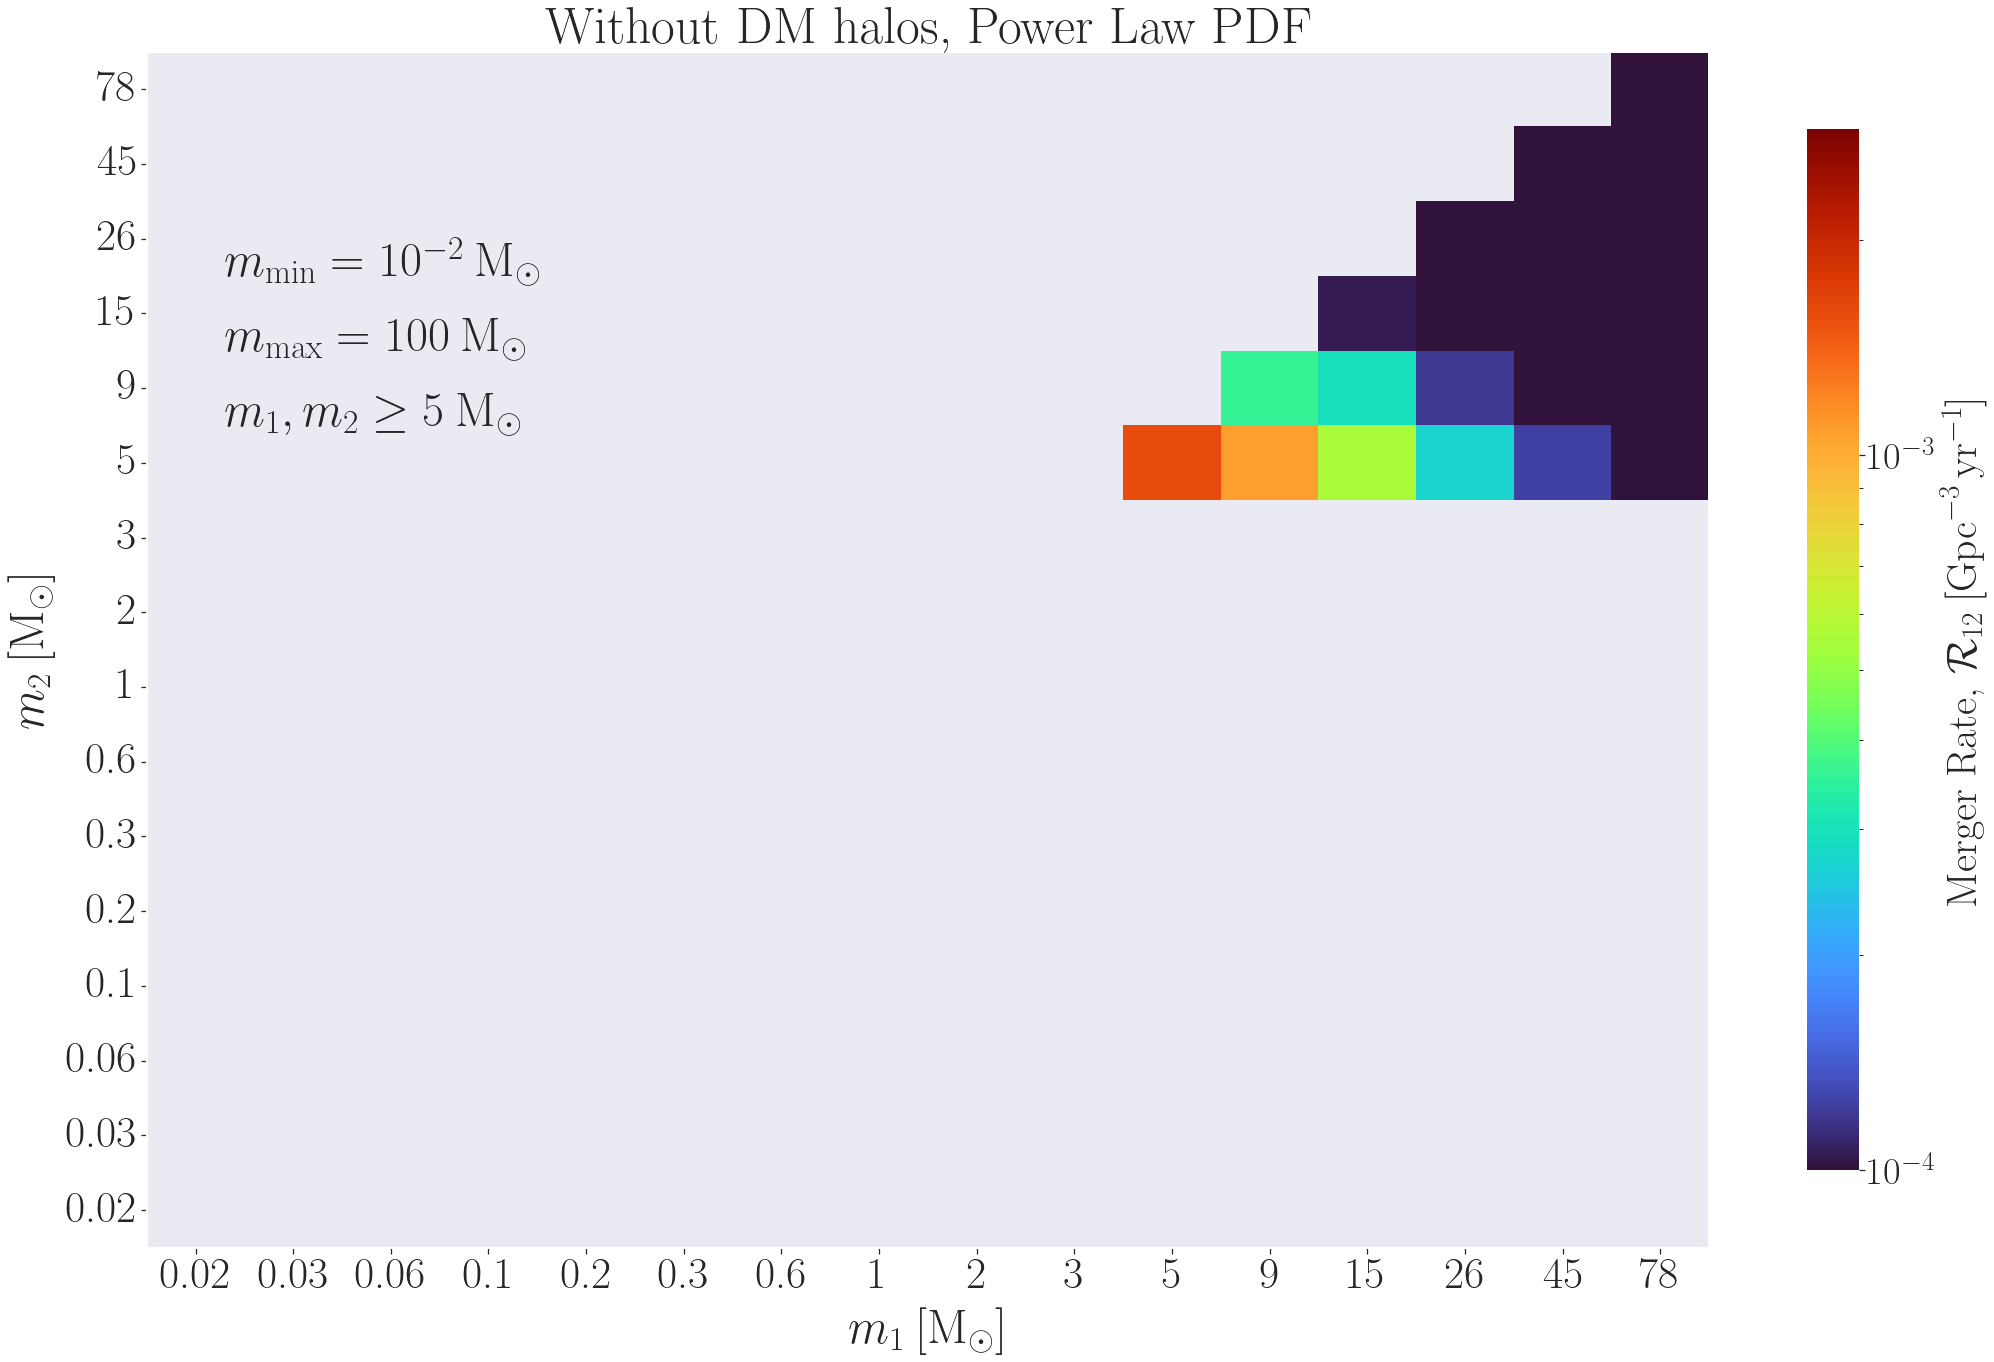

In [6]:
# Plot of merger rate for Power Law PBH mass function.

Merger_PWR_nohalo_LVK_range = np.load('Merger_PWR_nohalo_LVK_range.npy')
Merger_PWR_halo_method_1_LVK_range = np.load('Merger_PWR_halo_method_1_LVK_range.npy')



mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(35, 22))  


sns.set(font_scale = 3.5)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'


vmin = 1e-4
vmax = np.max(Merger_PWR_halo_method_1_LVK_range)
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_PWR_nohalo_LVK_range, mask = mask,  cmap = 'turbo', cbar = True, norm = norm,
                 cbar_kws = {"shrink": 0.87, 'label': 'Merger Rate, $\mathcal{R}_{12} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 fmt = '0.8f')



ax.set_xticklabels(m_1_list, fontsize = 200)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 200)
ax.tick_params(left=True, bottom=True)


ax.text(0.8, 13, "$m_\mathrm{{min}} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 12, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 11, "$m_{1}, m_{2} \geq 5 \: \mathrm{M_{\odot}}$", size = 48)


# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)


ax.invert_yaxis()
plt.xticks(fontsize = 44)
plt.yticks(fontsize = 44)
plt.xlabel('$m_{1}\:[\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)   # m_j = m_2
plt.ylabel('$m_{2}\: [\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Without DM halos, Power Law PDF', fontsize = 52, pad = 9)
plt.savefig('1PWRLawnoDM.pdf', bbox_inches = 'tight')
plt.show()     

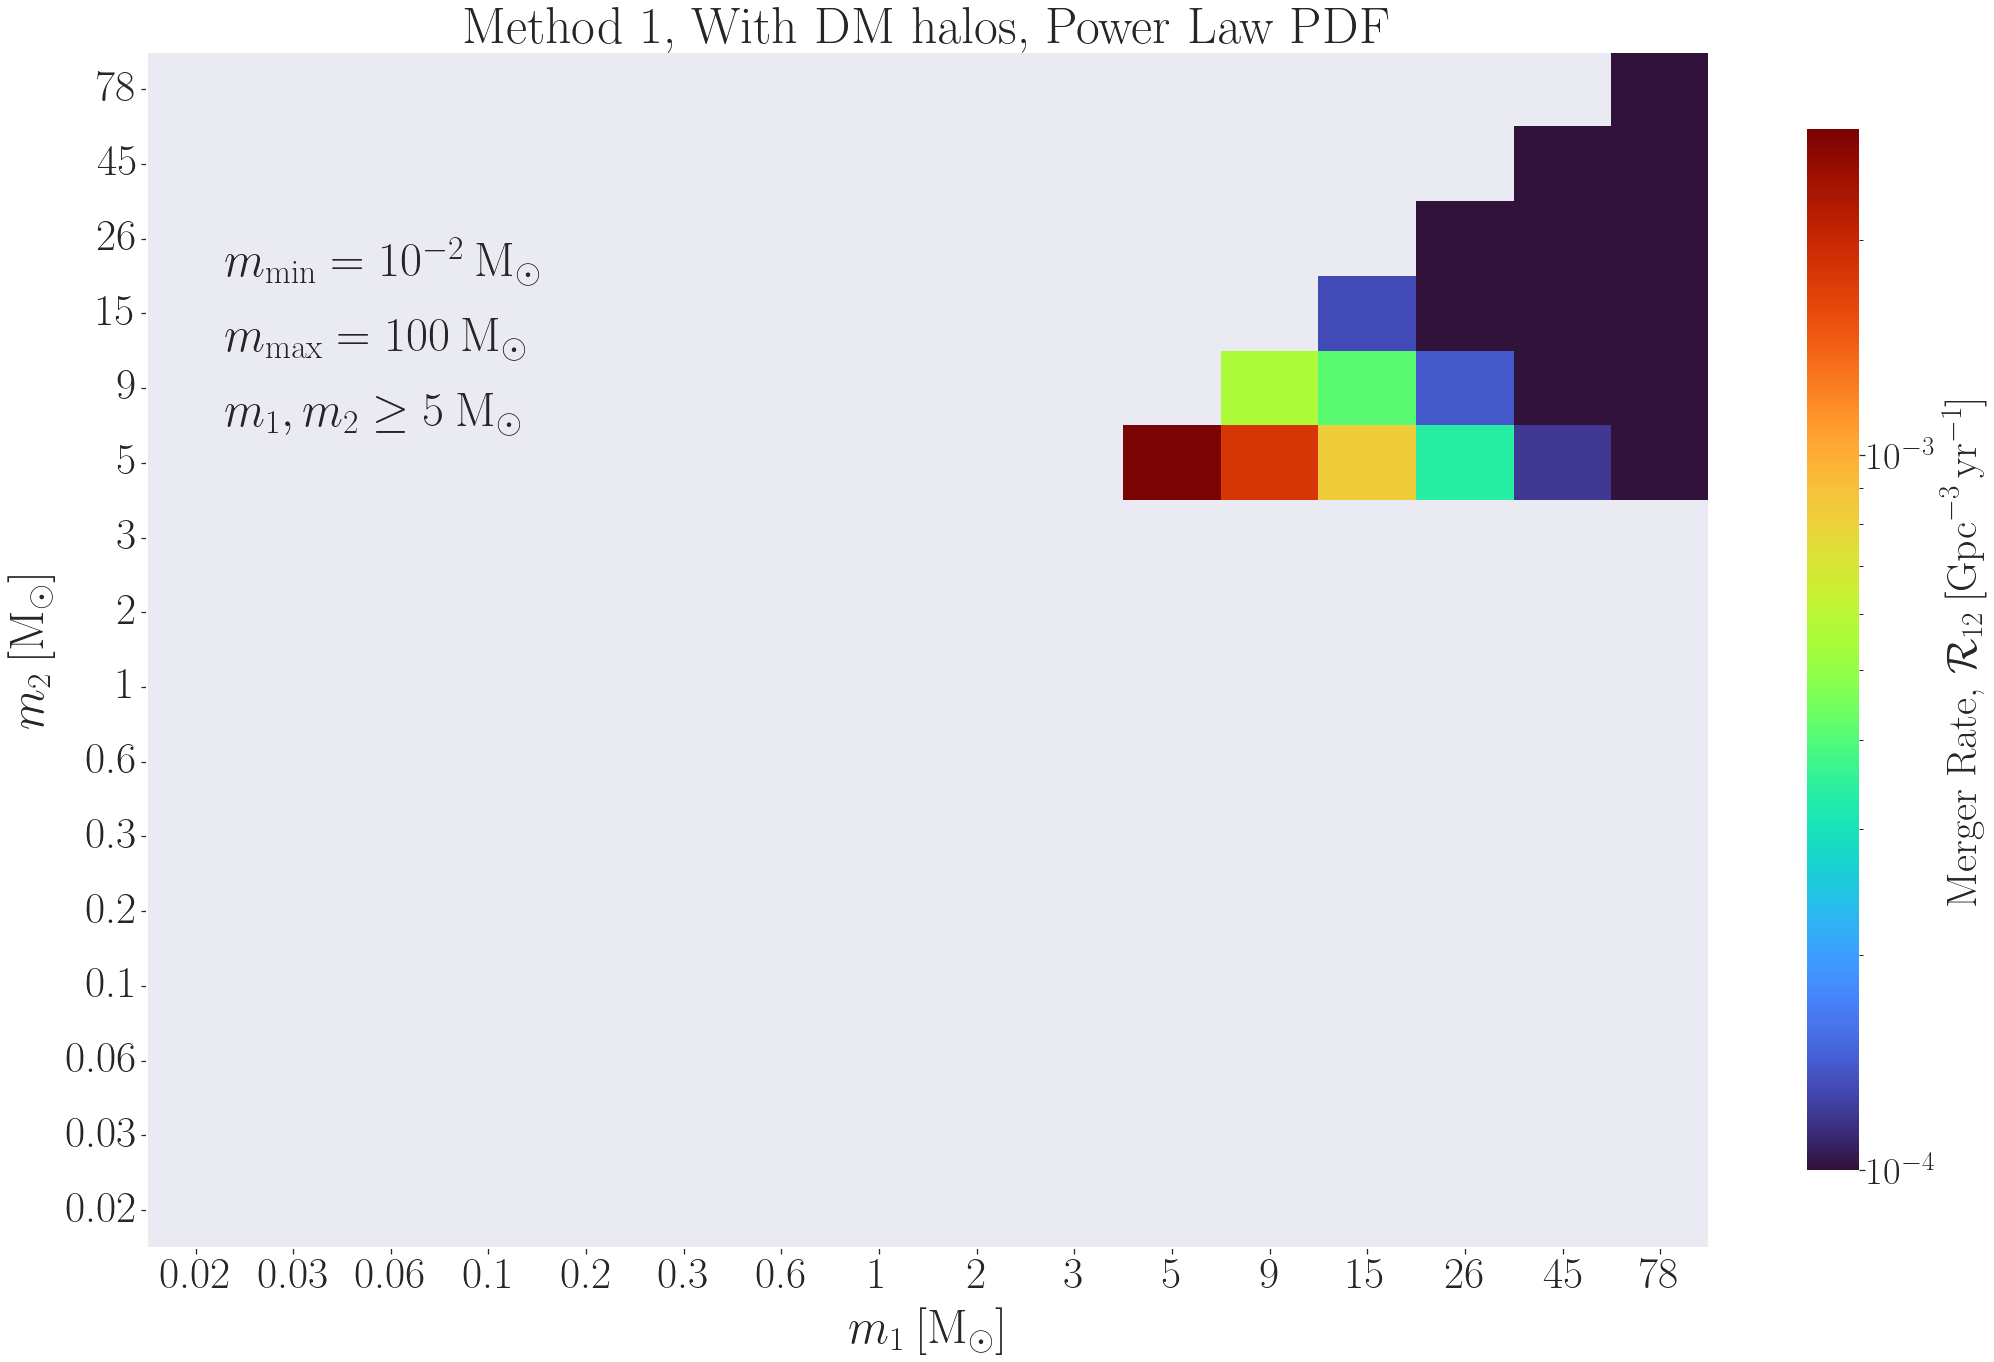

In [7]:
# Plot of merger rate for Power Law PBH mass function.


Merger_PWR_halo_method_1_LVK_range = np.load('Merger_PWR_halo_method_1_LVK_range.npy')



mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(35, 22))  


sns.set(font_scale = 3.5)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'


vmin = 1e-4
vmax = np.max(Merger_PWR_halo_method_1_LVK_range)
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_PWR_halo_method_1_LVK_range, mask = mask,  cmap = 'turbo', cbar = True, norm = norm,
                 cbar_kws = {"shrink": 0.87, 'label': 'Merger Rate, $\mathcal{R}_{12} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 fmt = '0.8f')



ax.set_xticklabels(m_1_list, fontsize = 200)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 200)
ax.tick_params(left=True, bottom=True)


ax.text(0.8, 13, "$m_\mathrm{{min}} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 12, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 11, "$m_{1}, m_{2} \geq 5 \: \mathrm{M_{\odot}}$", size = 48)


# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)


ax.invert_yaxis()
plt.xticks(fontsize = 44)
plt.yticks(fontsize = 44)
plt.xlabel('$m_{1}\:[\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)   # m_j = m_2
plt.ylabel('$m_{2}\: [\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Method 1, With DM halos, Power Law PDF', fontsize = 52, pad = 9)
plt.savefig('1hPWRLawDM.pdf', bbox_inches = 'tight')
plt.show()     

/tmp/ipykernel_34000/2009611107.py:9: RuntimeWarning: invalid value encountered in true_divide
  Merger_PWR_LVK_range_ratio_1 = np.divide(Merger_PWR_halo_method_1_LVK_range, Merger_PWR_nohalo_LVK_range)


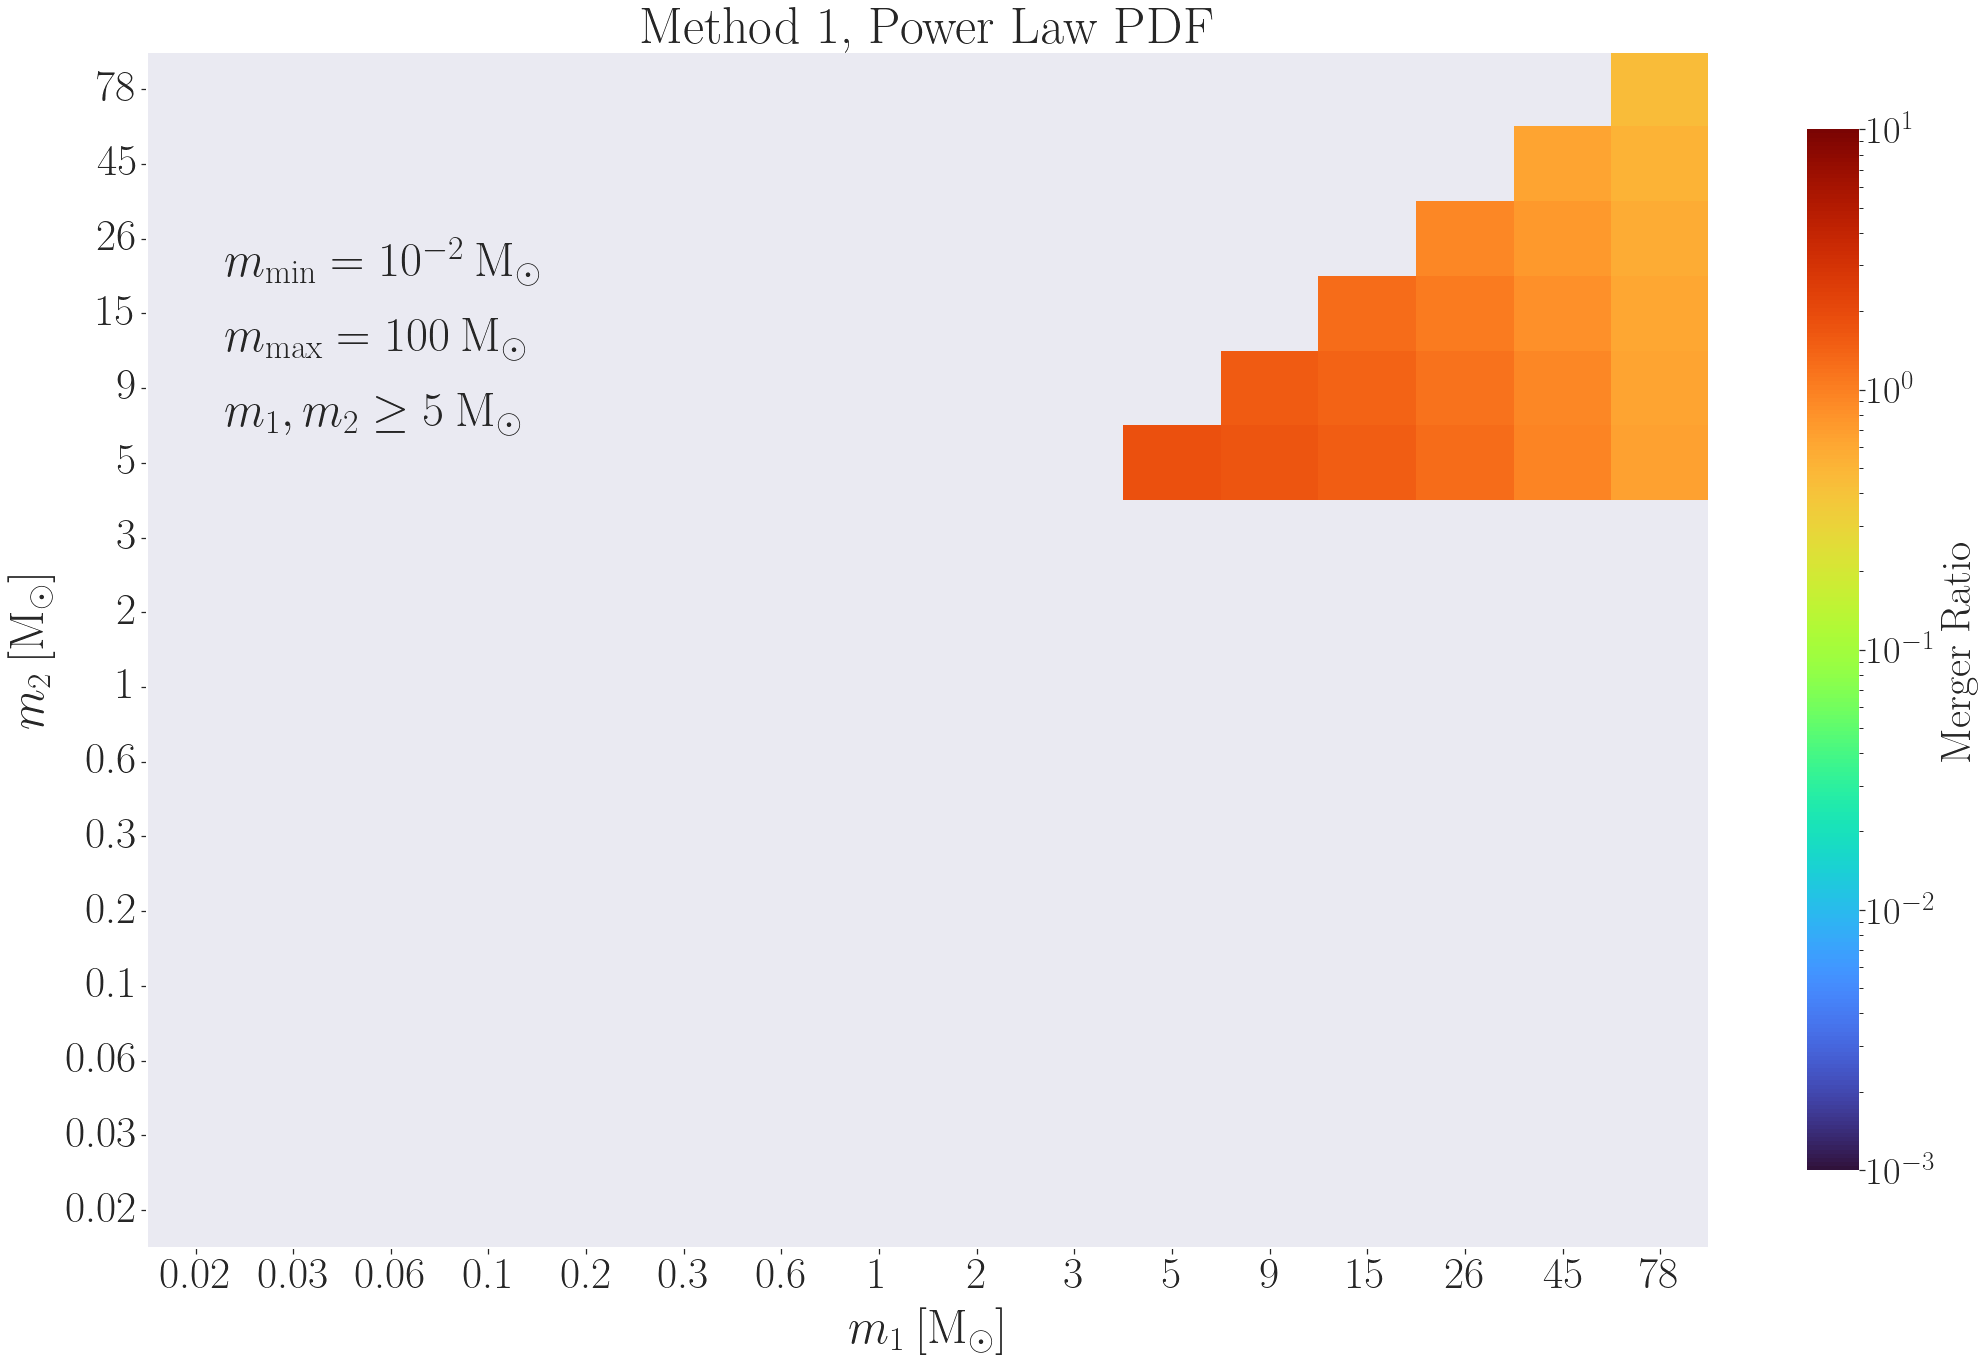

In [18]:
# Ratio of merger rate for binaries with and without DM halos for
# Power Law PDF in mass range (1e-2 - 100) M_sun.


Merger_PWR_nohalo_LVK_range = np.load('Merger_PWR_nohalo_LVK_range.npy')
Merger_PWR_halo_method_1_LVK_range = np.load('Merger_PWR_halo_method_1_LVK_range.npy')


Merger_PWR_LVK_range_ratio_1 = np.divide(Merger_PWR_halo_method_1_LVK_range, Merger_PWR_nohalo_LVK_range)


mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(35, 22))  


sns.set(font_scale = 3.5)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'


vmin = 1e-3
vmax = 10
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_PWR_LVK_range_ratio_1, mask = mask,  cmap = 'turbo', cbar = True, norm = norm,
                 cbar_kws = {"shrink": 0.87, 'label': 'Merger Ratio'},
                 fmt = '0.8f')



ax.set_xticklabels(m_1_list, fontsize = 200)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 200)
ax.tick_params(left=True, bottom=True)


ax.text(0.8, 13, "$m_\mathrm{{min}} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 12, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 11, "$m_{1}, m_{2} \geq 5 \: \mathrm{M_{\odot}}$", size = 48)


# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)


ax.invert_yaxis()
plt.xticks(fontsize = 44)
plt.yticks(fontsize = 44)
plt.xlabel('$m_{1}\:[\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)   # m_j = m_2
plt.ylabel('$m_{2}\: [\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Method 1, Power Law PDF', fontsize = 52, pad = 9)
plt.savefig('1rPWRLawPDF.pdf', bbox_inches = 'tight')
plt.show()     

In [8]:
# Merger rates plots for the range of PBH masses from m_min = 1e-4 M☉ - m_max = 100 M☉ using
# mass function of the paper https://arxiv.org/abs/2207.07576 . 

In [25]:
bin_centres = np.geomspace(2e-4, 69, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-4, 69, 16)
m_2 = np.geomspace(2e-4, 69, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.4f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.4f')), m_2_list)) 



m_1_list = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5, 
             12, 29, 69] 


m_2_list = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5,  
             12, 29, 69]



Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_min = 1e-4
m_max = 100

X_min = 1e-5
X_max = 1e5


m_1 = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5, 12, 29, 69] M☉

Δ_1 = [0.00017518, 0.0004099, 0.00095911, 0.00224417, 0.00525102, 0.0122866, 0.0287488, 0.06726787, 0.15739669, 0.36828457, 0.86173051, 2.01631977, 4.71788496, 11.03914116, 25.82992984, 60.43815056]


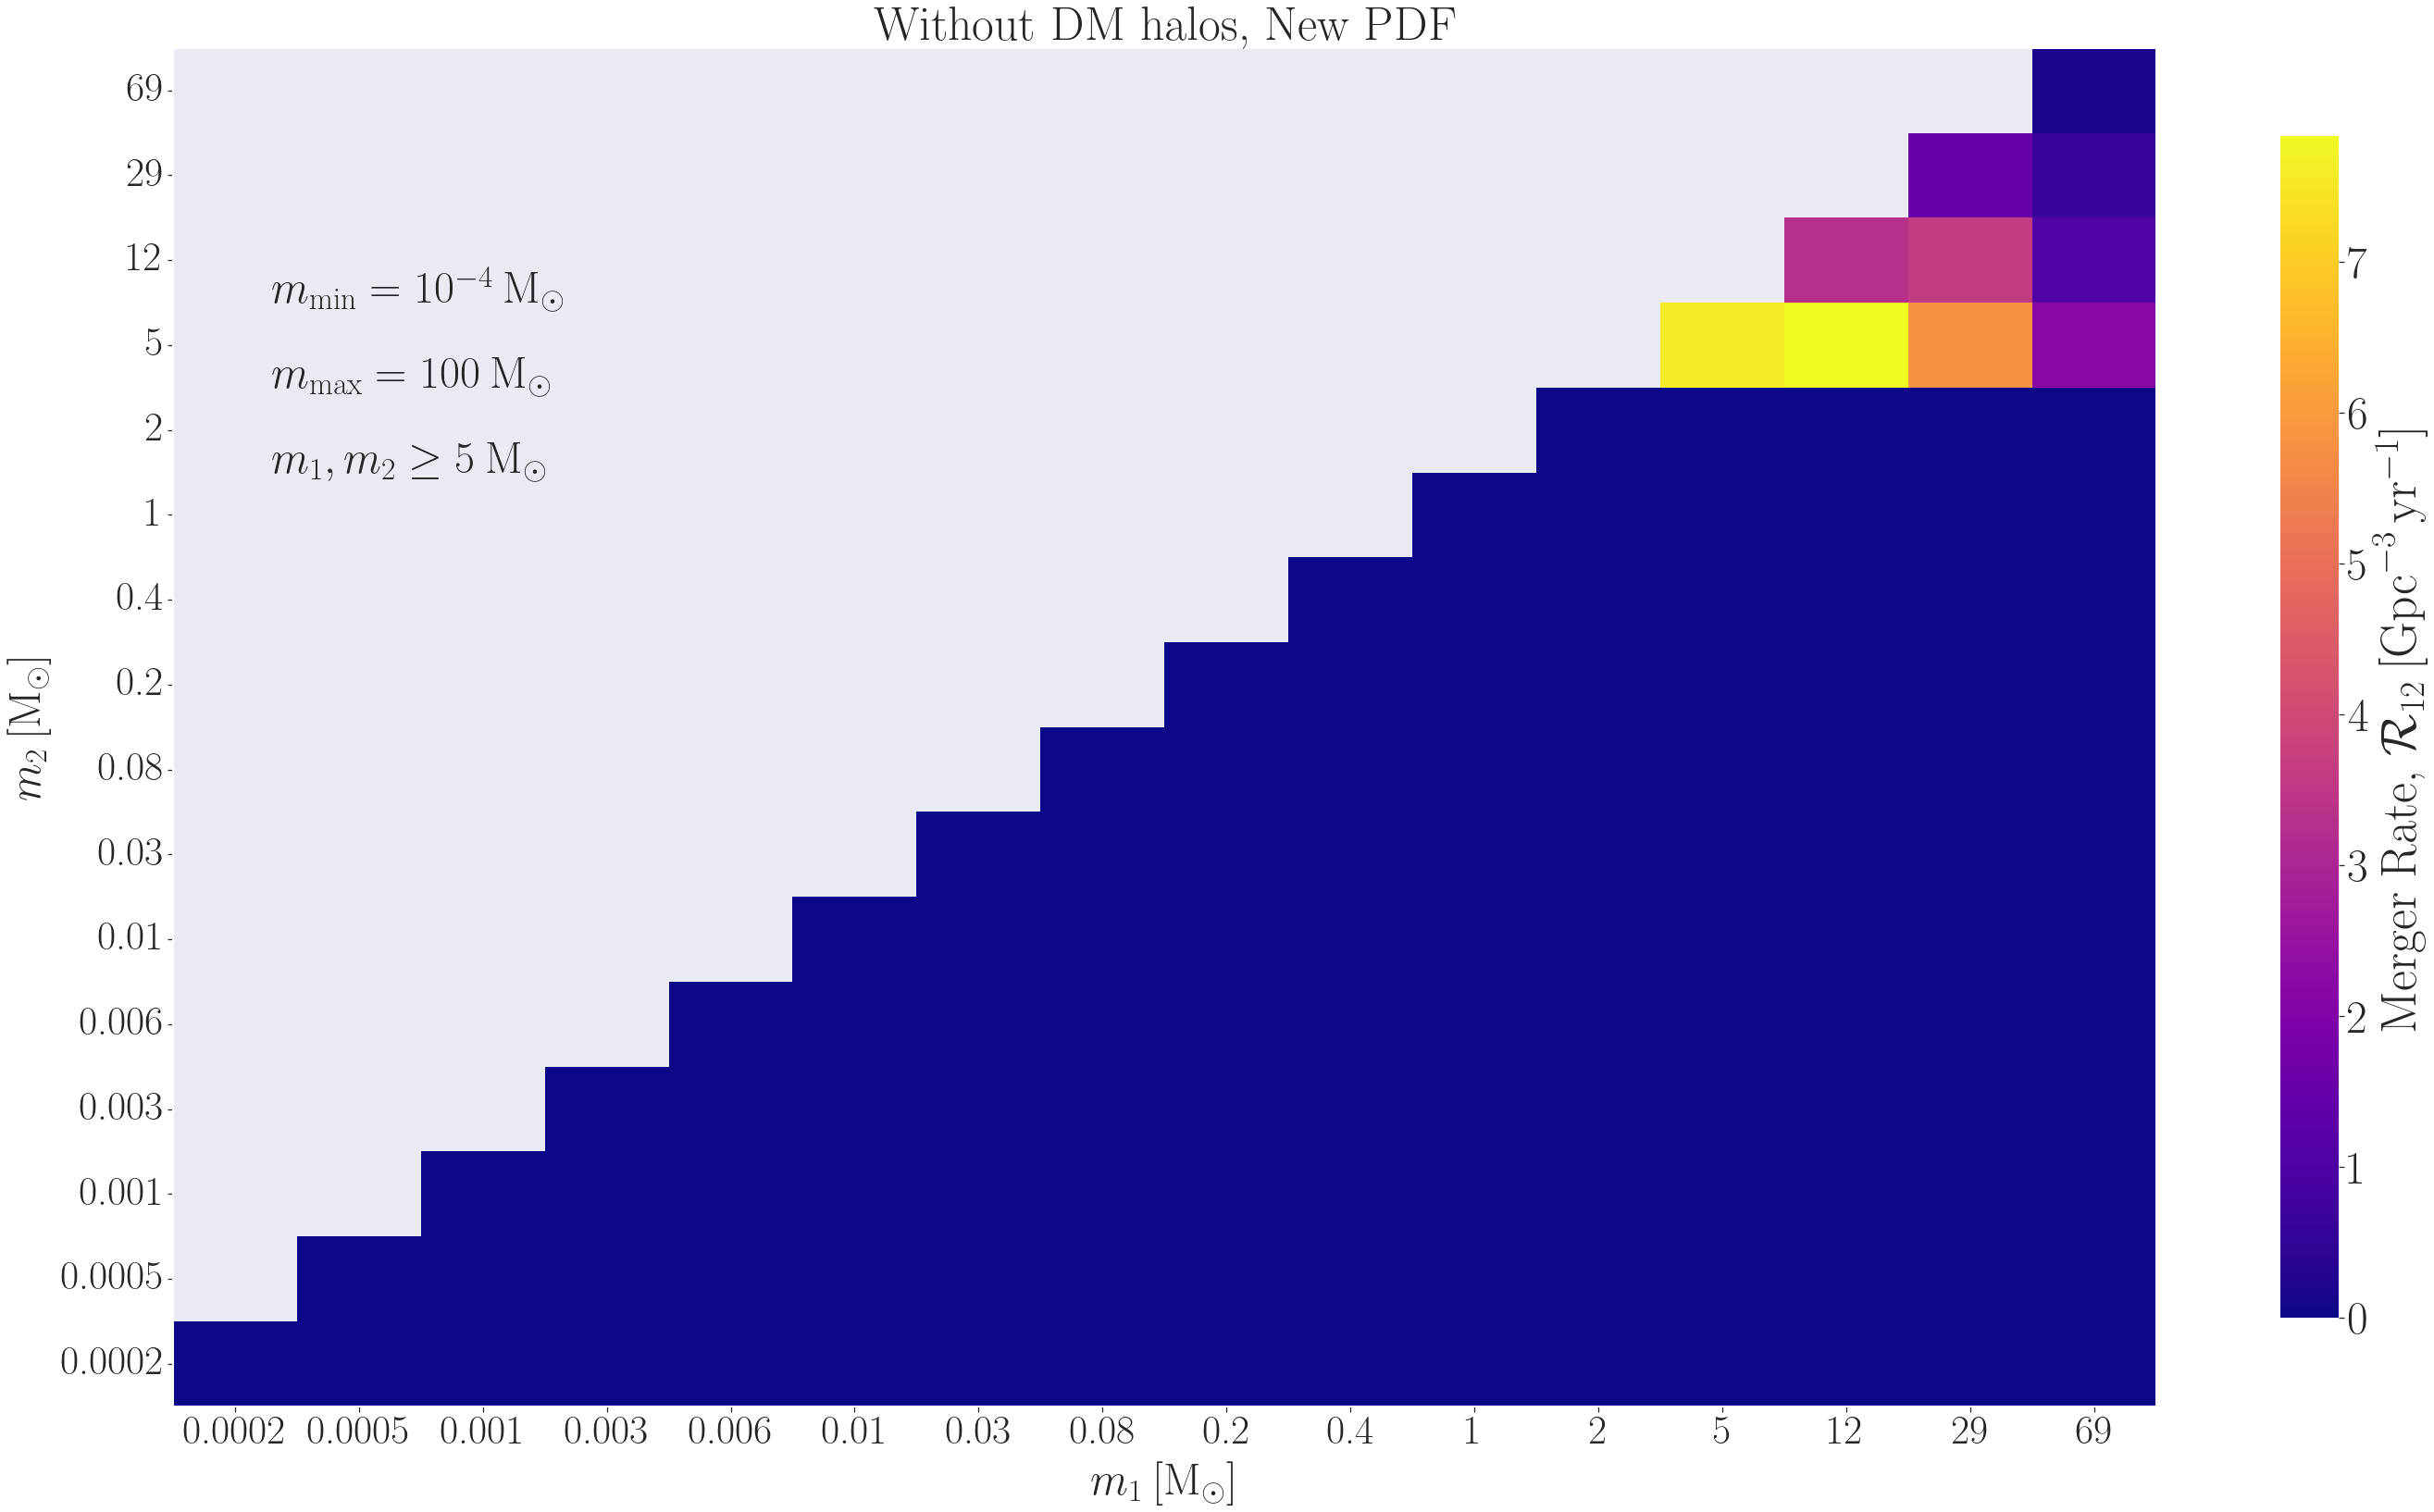

In [26]:
# Plot of merger rate for Power Law PBH mass function.

Merger_new_PDF_nohalo_LVK_range = np.load('Merger_new_PDF_nohalo_LVK_range.npy')
Merger_new_PDF_halo_method_1_LVK_range = np.load('Merger_new_PDF_halo_method_1_LVK_range.npy')



mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(48, 27))  


sns.set(font_scale = 4.5)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'


vmin = np.min(Merger_new_PDF_halo_method_1_LVK_range)
vmax = np.max(Merger_new_PDF_halo_method_1_LVK_range)
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_new_PDF_nohalo_LVK_range, mask = mask,  cmap = 'plasma', cbar = True, 
                 cbar_kws = {"shrink": 0.87, 'label': 'Merger Rate, $\mathcal{R}_{12} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 fmt = '0.8f')



ax.set_xticklabels(m_1_list, fontsize = 200)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 200)
ax.tick_params(left=True, bottom=True)



ax.text(0.8, 13, "$m_\mathrm{{min}} = 10^{-4} \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 12, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 11, "$m_{1}, m_{2} \geq 5 \: \mathrm{M_{\odot}}$", size = 48)


# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)


ax.invert_yaxis()
plt.xticks(fontsize = 44)
plt.yticks(fontsize = 44)
plt.xlabel('$m_{1}\:[\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)   # m_j = m_2
plt.ylabel('$m_{2}\: [\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Without DM halos, New PDF', fontsize = 52, pad = 9)
plt.savefig('1newPDFnoDM.pdf', bbox_inches = 'tight')
plt.show()     

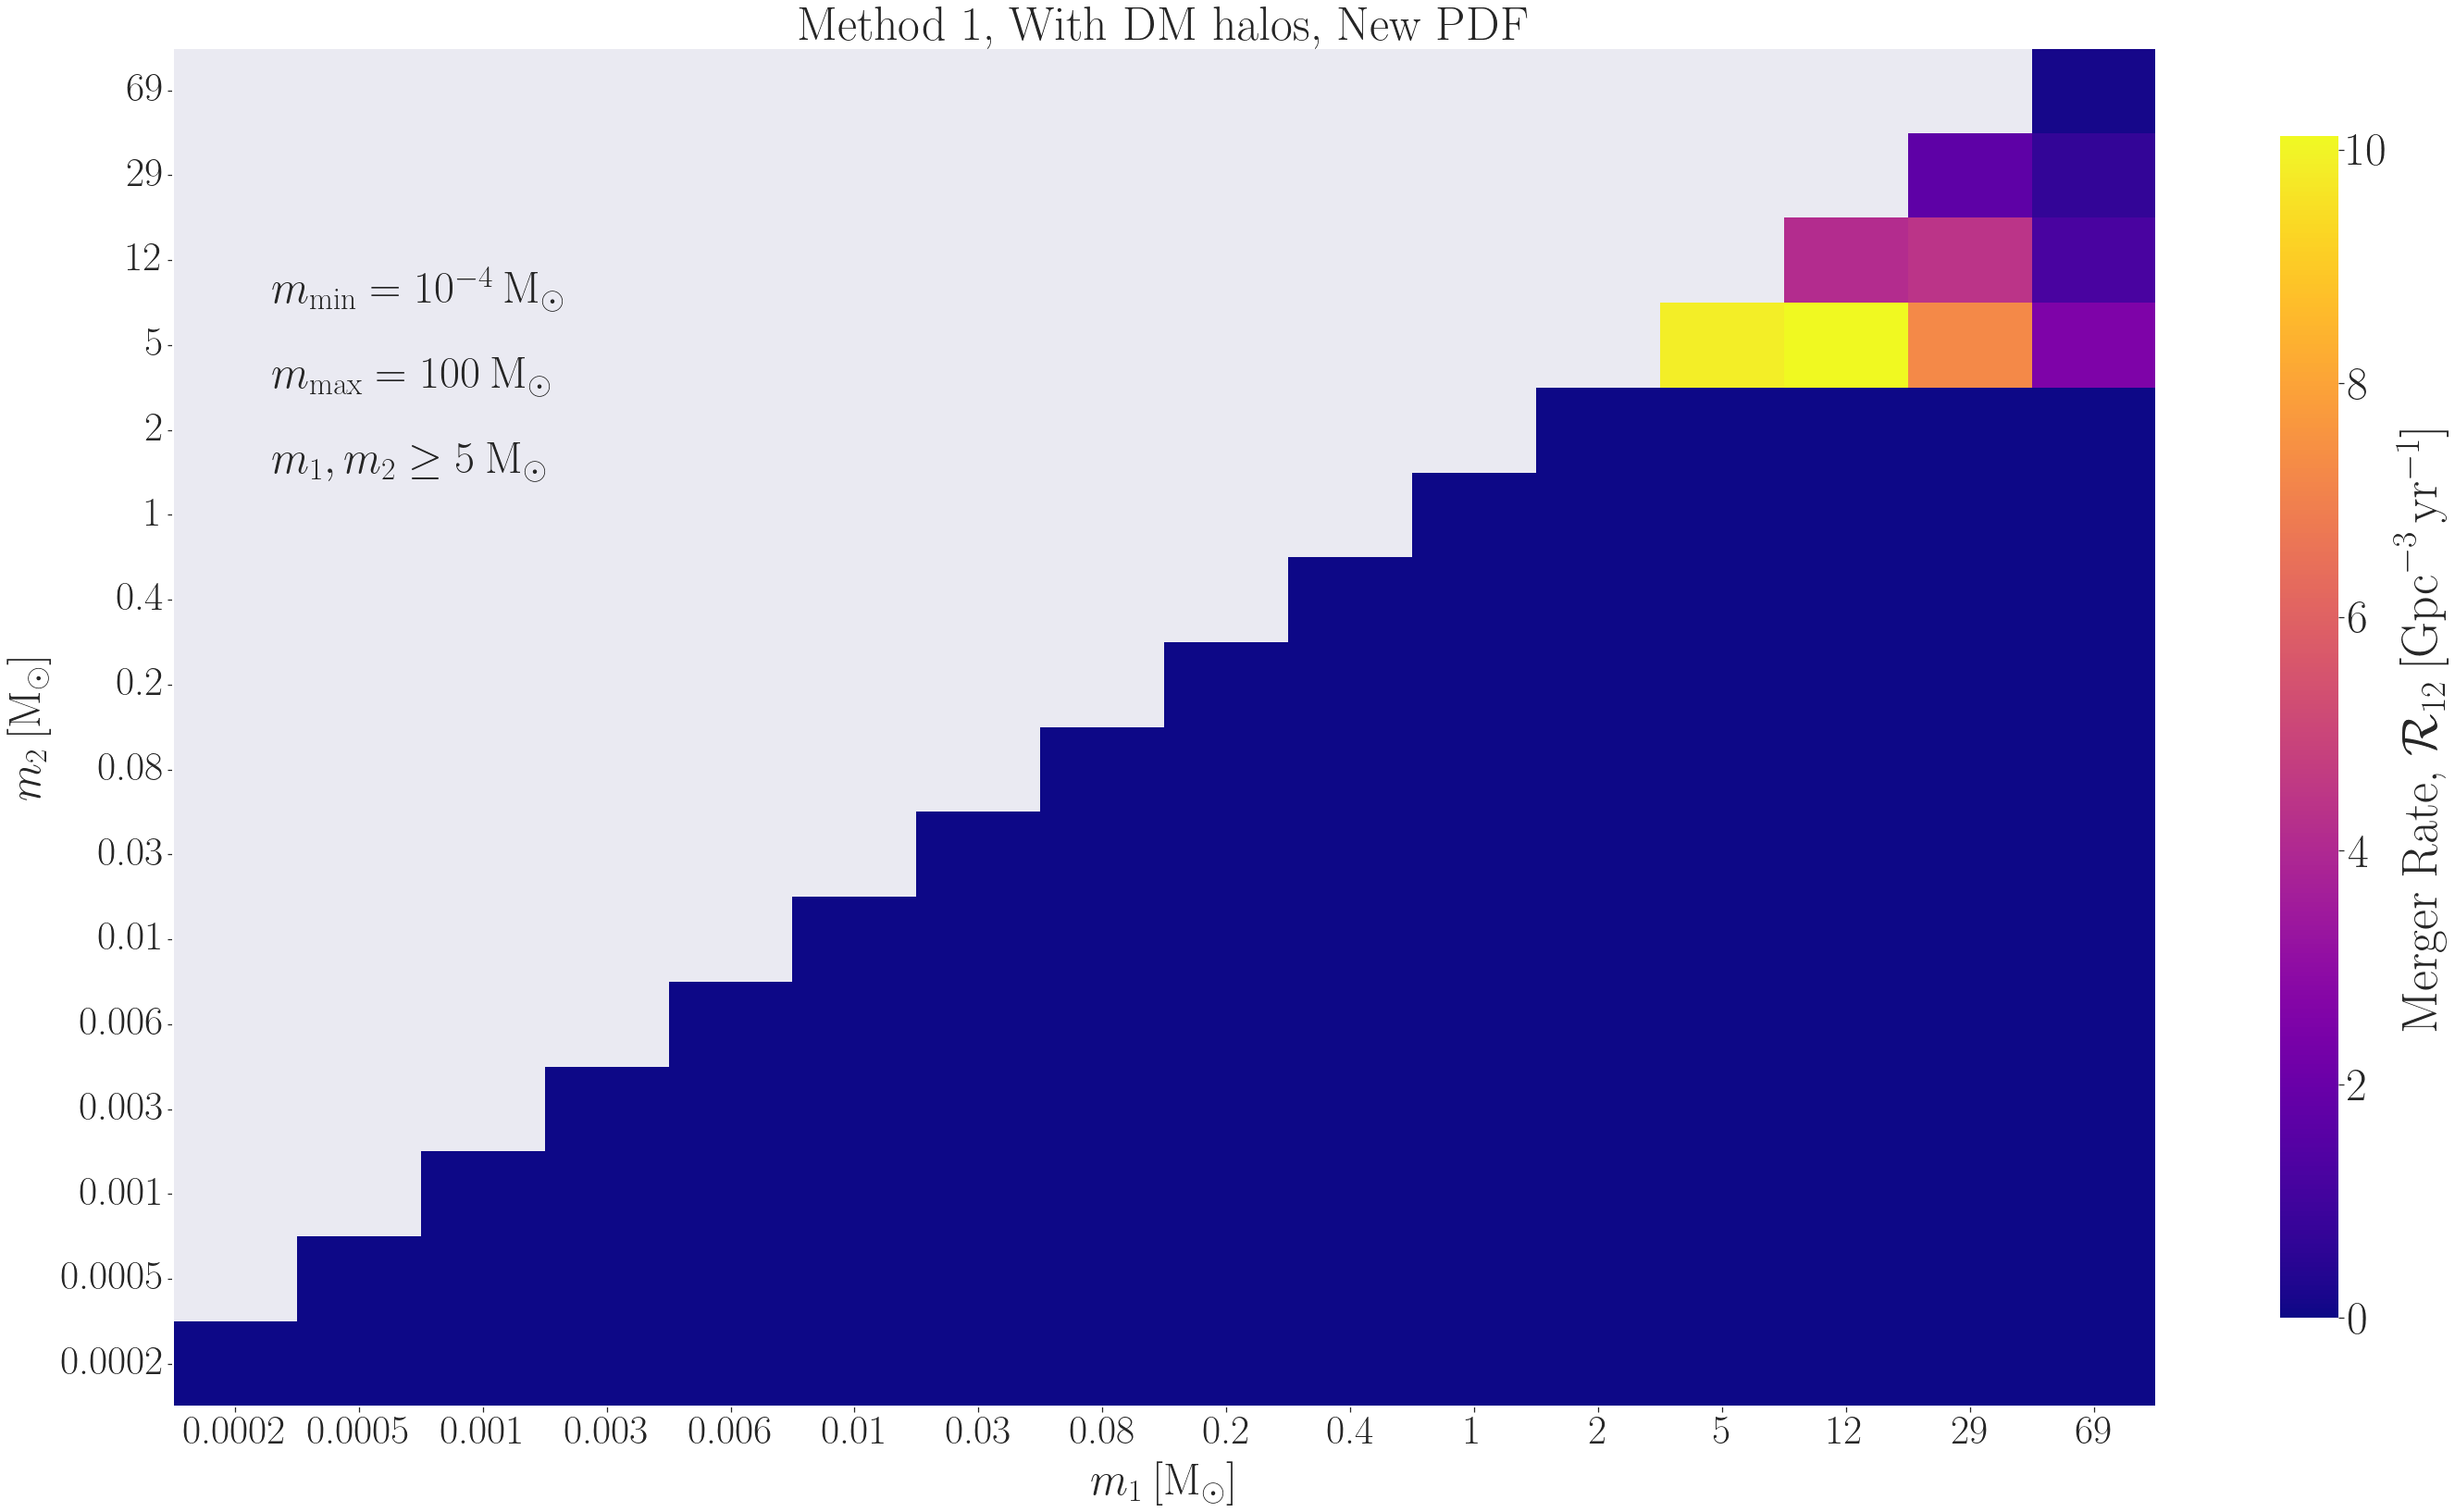

In [27]:
# Plot of merger rate for Power Law PBH mass function.

Merger_new_PDF_halo_method_1_LVK_range = np.load('Merger_new_PDF_halo_method_1_LVK_range.npy')



mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(48, 27))  


sns.set(font_scale = 4.5)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'


vmin = np.min(Merger_new_PDF_halo_method_1_LVK_range)
vmax = np.max(Merger_new_PDF_halo_method_1_LVK_range)
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_new_PDF_halo_method_1_LVK_range, mask = mask,  cmap = 'plasma', cbar = True, 
                 cbar_kws = {"shrink": 0.87, 'label': 'Merger Rate, $\mathcal{R}_{12} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 fmt = '0.8f')



ax.set_xticklabels(m_1_list, fontsize = 200)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 200)
ax.tick_params(left=True, bottom=True)



ax.text(0.8, 13, "$m_\mathrm{{min}} = 10^{-4} \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 12, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 11, "$m_{1}, m_{2} \geq 5 \: \mathrm{M_{\odot}}$", size = 48)


# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)


ax.invert_yaxis()
plt.xticks(fontsize = 44)
plt.yticks(fontsize = 44)
plt.xlabel('$m_{1}\:[\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)   # m_j = m_2
plt.ylabel('$m_{2}\: [\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Method 1, With DM halos, New PDF', fontsize = 52, pad = 9)
plt.savefig('1hnewPDFDM.pdf', bbox_inches = 'tight')
plt.show()     

/tmp/ipykernel_34000/2180069522.py:8: RuntimeWarning: invalid value encountered in true_divide
  Merger_new_PDF_LVK_range_ratio_1 = np.divide(Merger_new_PDF_halo_method_1_LVK_range, Merger_new_PDF_nohalo_LVK_range)


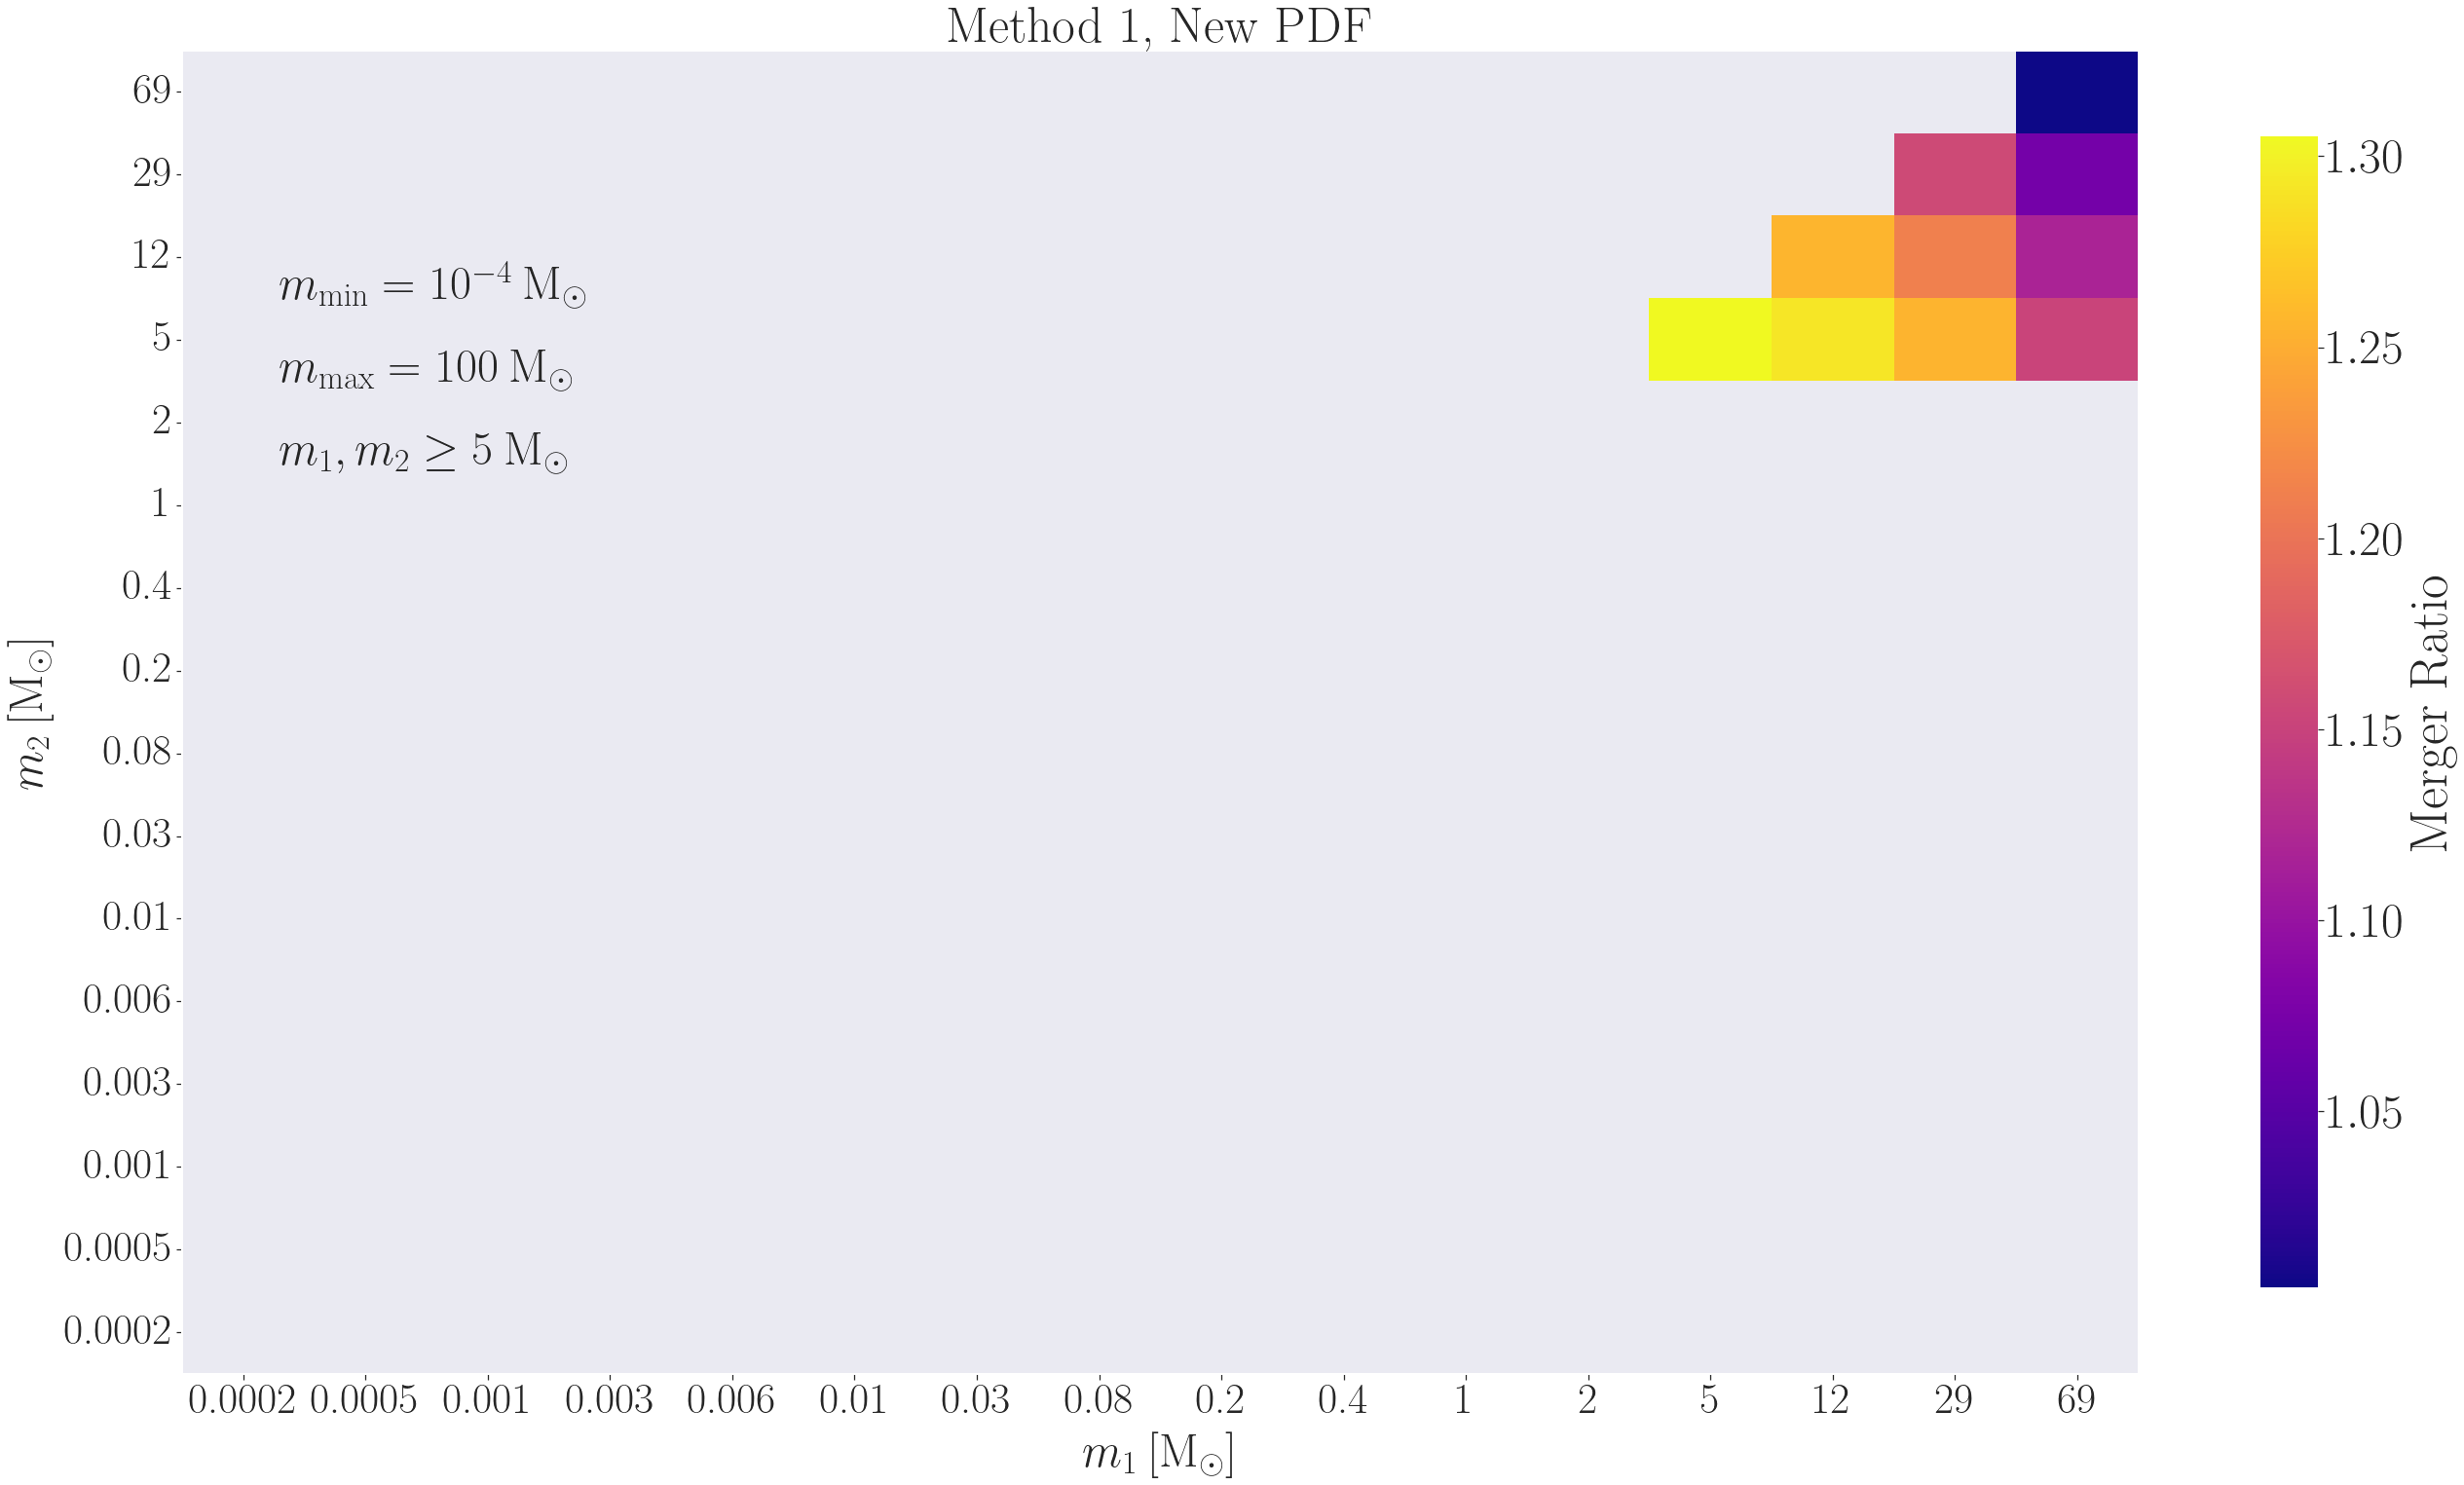

In [28]:
# Ratio of merger rate for binaries with and without DM halos for
# PDF of the paper https://arxiv.org/abs/2207.07576  in 
#  mass range (1e-4 - 100) M_sun.

Merger_new_PDF_nohalo_LVK_range = np.load('Merger_new_PDF_nohalo_LVK_range.npy')
Merger_new_PDF_halo_method_1_LVK_range = np.load('Merger_new_PDF_halo_method_1_LVK_range.npy')

Merger_new_PDF_LVK_range_ratio_1 = np.divide(Merger_new_PDF_halo_method_1_LVK_range, Merger_new_PDF_nohalo_LVK_range)


mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(45, 25))  


sns.set(font_scale = 4.5)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'


vmin = np.min(Merger_new_PDF_LVK_range_ratio_1)
vmax = np.max(Merger_new_PDF_LVK_range_ratio_1)
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_new_PDF_LVK_range_ratio_1, mask = mask,  cmap = 'plasma', cbar = True, 
                 cbar_kws = {"shrink": 0.87, 'label': 'Merger Ratio'},
                 fmt = '0.8f')



ax.set_xticklabels(m_1_list, fontsize = 200)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 200)
ax.tick_params(left=True, bottom=True)



ax.text(0.8, 13, "$m_\mathrm{{min}} = 10^{-4} \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 12, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 48)
ax.text(0.8, 11, "$m_{1}, m_{2} \geq 5 \: \mathrm{M_{\odot}}$", size = 48)


# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)


ax.invert_yaxis()
plt.xticks(fontsize = 44)
plt.yticks(fontsize = 44)
plt.xlabel('$m_{1}\:[\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)   # m_j = m_2
plt.ylabel('$m_{2}\: [\mathrm{M_{\odot}}]$', fontsize = 48, labelpad = 11)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Method 1, New https://github.com/pratibhajangra591/Ifca-github/blob/main/Merger_method1.ipynbPDF', fontsize = 52, pad = 9)
plt.savefig('1rnewPDF.pdf', bbox_inches = 'tight')
plt.show()     